#### Example – Coin flipping simulation with Monte-Carlo simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

#### Flip 20 coins – 10 different times (10 simularions)

In [69]:
### flip 20 coins, 10 different times

# set up variables
n_coins = 20 
simulations = 10 
p = 0.5           # probability each coin lands in heads

# simulate observed number of heads from flipping 20 coints 10 times
simulation_results = np.random.binomial(n=n_coins, p=p, size = simulations)

# lets observe the results.
np.random.seed(84)              # reproducibility.
print('\n')
print('Simulation Results (# Heads / Sim):', simulation_results) # Only one scenario with exactly 10 heads.

# Results analysis                                   # One out of 10 simulations has exactly 10 heads
count = np.equal(simulation_results, 10).sum()       # counts number of 10s = 1
p_count_10 = np.equal(simulation_results, 10).mean() # compute probability of such result (10 exact heads)
probabilities_i = [np.equal(simulation_results, i).mean() for i in range(n_coins)]   # np.equal(array, i)
print('\n')
print('Probabilities of 0-20 Heads:', probabilities_i)



Simulation Results (# Heads / Sim): [ 6  9  8 11 15  7  8  9 10  7]


Probabilities of 0-20 Heads: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0]


#### Plot the Probability Distribution

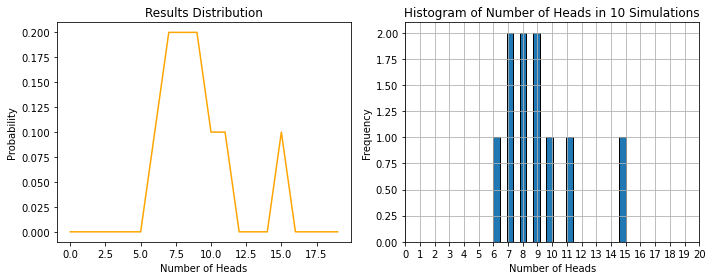

In [96]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1x2 subplots matrix

# Plot Results Distribution
ax1.plot(list(range(n_coins)), probabilities_i, color='orange')
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Probability')
ax1.set_title('Results Distribution')

# Plot histogram
ax2.hist(simulation_results, bins=20, edgecolor='black')
ax2.set_title('Histogram of Number of Heads in 10 Simulations')
ax2.set_xlabel('Number of Heads')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(0, n_coins + 1))
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


#### Now Run the Simulation with 10,000 trials (Obseved --> Theoretical Values)
#### Flip 20 coins 10,000 times

[0.0, 0.0, 0.0001, 0.0013, 0.0048, 0.0149, 0.0357, 0.0746, 0.1253, 0.1607, 0.1755, 0.1623, 0.1147, 0.072, 0.0361, 0.0155, 0.005, 0.0014, 0.0001, 0.0]


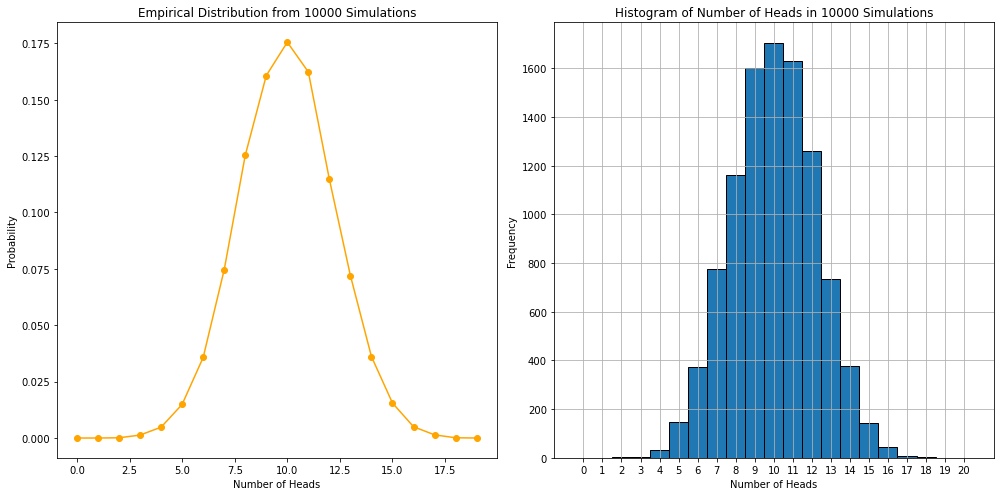

In [154]:
#%% Flip 20 coins 10,000 times

simulations = 10000

sim_results = np.random.binomial(n=n_coins, p=p, size=simulations) # recall coin flipping follows a binomial distributio
probabilities_i = [np.equal(results, i).mean() for i in range(n_coins)]
print(probabilities_i) # For each number 1-20, computes the prob for heads appearing that no. of times,

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot empirical probability distribution
ax1.plot(range(n_coins), probabilities_i, color='orange', marker='o')
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Probability')
ax1.set_title(f'Empirical Distribution from {simulations} Simulations')

# Plot histogram
ax2.hist(sim_results, bins=range(n_coins + 2), edgecolor='black', align='left')
ax2.set_title(f'Histogram of Number of Heads in {simulations} Simulations')
ax2.set_xlabel('Number of Heads')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(0, n_coins + 1))
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

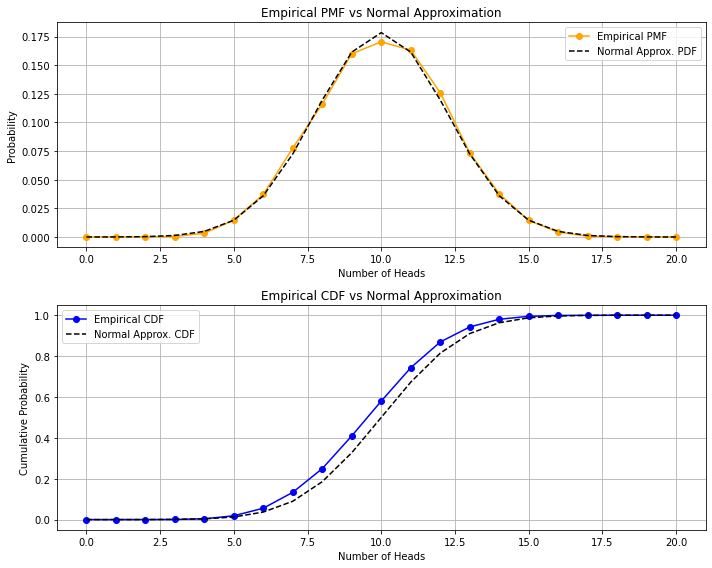

In [156]:
#### We could also plot using Scipy stats package:
from scipy.stats import norm


# Empirical probability mass function 'pmf'
counts = np.bincount(sim_results, minlength=n_coins + 1)
probabilities_i = counts / simulations

# Normal approximation
mu = n_coins * p
sigma = np.sqrt(n_coins * p * (1 - p))
x_vals = np.arange(0, n_coins + 1)
pdf_normal = norm.pdf(x_vals, mu, sigma)
cdf_normal = norm.cdf(x_vals, mu, sigma)

# Empirical CDF
empirical_cdf = np.cumsum(probabilities_i)

# Plot PMF + Normal PDF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Probability distribution with normal overlay
ax1.plot(x_vals, probabilities_i, 'o-', label='Empirical PMF', color='orange')
ax1.plot(x_vals, pdf_normal, 'k--', label='Normal Approx. PDF')
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Probability')
ax1.set_title('Empirical PMF vs Normal Approximation')
ax1.legend()
ax1.grid(True)

# CDF comparison
ax2.plot(x_vals, empirical_cdf, 'o-', label='Empirical CDF', color='blue')
ax2.plot(x_vals, cdf_normal, 'k--', label='Normal Approx. CDF')
ax2.set_xlabel('Number of Heads')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Empirical CDF vs Normal Approximation')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
